## التزلج على العمود المتحرك

> **المشكلة**: إذا أراد بيتر الهروب من الذئب، فعليه أن يتحرك أسرع منه. سنرى كيف يمكن لبيتر أن يتعلم التزلج، وبالأخص الحفاظ على التوازن، باستخدام التعلم المعزز (Q-Learning).

أولاً، دعونا نقوم بتثبيت مكتبة gym واستيراد المكتبات المطلوبة:


In [1]:
#code block 1

## أنشئ بيئة عربة القطب


In [ ]:
#code block 2

لرؤية كيفية عمل البيئة، دعنا نجري محاكاة قصيرة لمدة 100 خطوة.


In [ ]:
#code block 3

أثناء المحاكاة، نحتاج إلى الحصول على الملاحظات لتحديد كيفية التصرف. في الواقع، تقوم وظيفة `step` بإرجاع الملاحظات الحالية، دالة المكافأة، وعلامة `done` التي تشير إلى ما إذا كان من المنطقي متابعة المحاكاة أم لا:


In [ ]:
#code block 4

يمكننا الحصول على القيمة الصغرى والكبرى لتلك الأرقام:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

دعونا نستكشف أيضًا طريقة أخرى للتقسيم باستخدام الحاويات:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


لنقم الآن بتشغيل محاكاة قصيرة ومراقبة تلك القيم البيئية المنفصلة.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## هيكل الجدول Q


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


## رسم تقدم التدريب


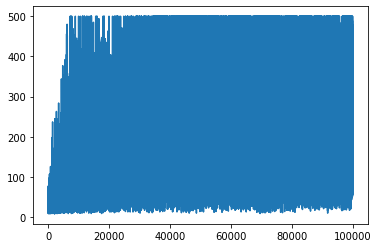

In [20]:
plt.plot(rewards)

من هذا الرسم البياني، لا يمكن معرفة أي شيء، لأن طبيعة عملية التدريب العشوائية تؤدي إلى اختلاف كبير في مدة جلسات التدريب. لجعل هذا الرسم البياني أكثر وضوحًا، يمكننا حساب **المتوسط المتحرك** عبر سلسلة من التجارب، لنقل 100. يمكن القيام بذلك بسهولة باستخدام `np.convolve`:


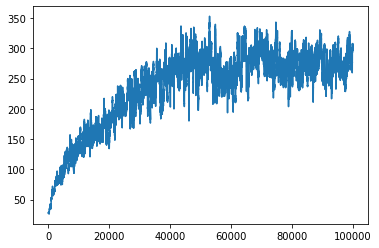

In [22]:
#code block 12

## تغيير المعاملات الفائقة ومشاهدة النتيجة عمليًا

سيكون من المثير للاهتمام الآن أن نرى كيف يتصرف النموذج المدرب فعليًا. دعونا نقوم بتشغيل المحاكاة، وسنتبع نفس استراتيجية اختيار الإجراءات كما فعلنا أثناء التدريب: أخذ عينات وفقًا لتوزيع الاحتمالات في Q-Table:


In [23]:
# code block 13

## حفظ النتيجة كصورة GIF متحركة

إذا كنت ترغب في إبهار أصدقائك، قد ترغب في إرسال صورة GIF متحركة للعمود المتوازن لهم. للقيام بذلك، يمكننا استخدام `env.render` لإنتاج إطار صورة، ثم حفظ هذه الإطارات كصورة GIF متحركة باستخدام مكتبة PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**إخلاء المسؤولية**:  
تمت ترجمة هذه الوثيقة باستخدام خدمة الترجمة الآلية [Co-op Translator](https://github.com/Azure/co-op-translator). على الرغم من أننا نسعى لتحقيق الدقة، يرجى العلم أن الترجمات الآلية قد تحتوي على أخطاء أو معلومات غير دقيقة. يجب اعتبار الوثيقة الأصلية بلغتها الأصلية المصدر الموثوق. للحصول على معلومات حساسة أو هامة، يُوصى بالاستعانة بترجمة بشرية احترافية. نحن غير مسؤولين عن أي سوء فهم أو تفسيرات خاطئة ناتجة عن استخدام هذه الترجمة.
